## bracket (구간정하기)

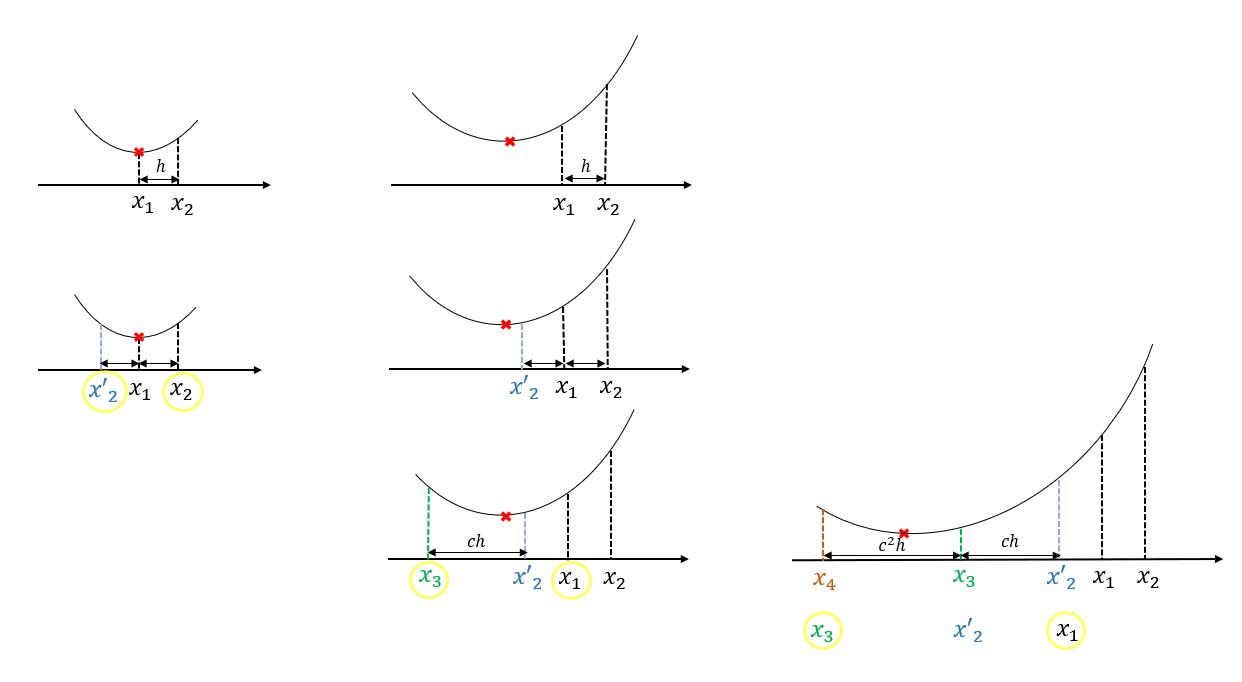

In [2]:
from IPython.display import Image
Image(filename='10.png',width="800")

1) $f(x_2')$이 $f(x_1)$보다 크면 $(x'_2, x_1)$에 최소점이 있음

2) $f(x_2')$이 $f(x_1)$보다 작으면 최소점이 없음. 따라서 ch만큼 떨어진 곳에 $x_3$을 만들어 $f(x_3)$이 $f(x_1)$보다 크면 $(x_3,x_1)$에 최소점이 있음.


In [4]:
import math
def bracket(f,x1,h):
    c = 1.618033989
    f1 = f(x1)
    x2 = x1 + h; f2 = f(x2)

# Determine downhill direction and change sign of h if needed
    if f2 > f1:
        h = -h
        x2 = x1 + h; f2 = f(x2)
# Check if minimum between x1 - h and x1 + h
        if f2 > f1: 
            return x2,x1 - h
# Search loop
    for i in range (100):
        h = c*h
        x3 = x2 + h
        f3 = f(x3)
        if f3 > f2: 
            return x1,x3
        x1 = x2
        x2 = x3
        f1 = f2
        f2 = f3
    print("Bracket did not find a minimum")

## GoldSearch (근찾기)

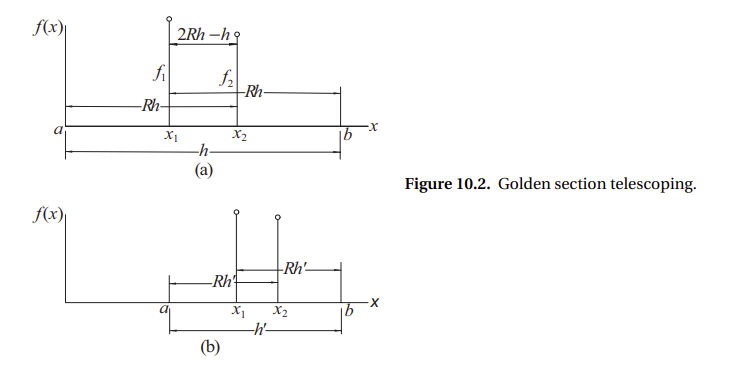

In [2]:
Image(filename='54.png',width="800")

(a) $x_1=b-Rh , ~~ x_2=a+Rh$ 점을 잡고 함수 값을 계산한다.<br>
그림처럼 $f(x_1)>f(x_2)$이면 $(x_1,b)$구간에 최소값이 있다.

(b)$(x_1,b)$ 구간을 새로운 $(a,b)$로 재 설정. 내부에서 또 $x_1=b-Rh , ~~ x_2=a+Rh$ 점을 잡아 함수 값 비교해 구간을 줄여간다.

그림 (b)에서 $x_1-a = h'-Rh' > 2Rh-h = h'-Rh' (h'=Rh)$를 이용해 풀면 $R=0.618033....$ 을 구할 수 있다.

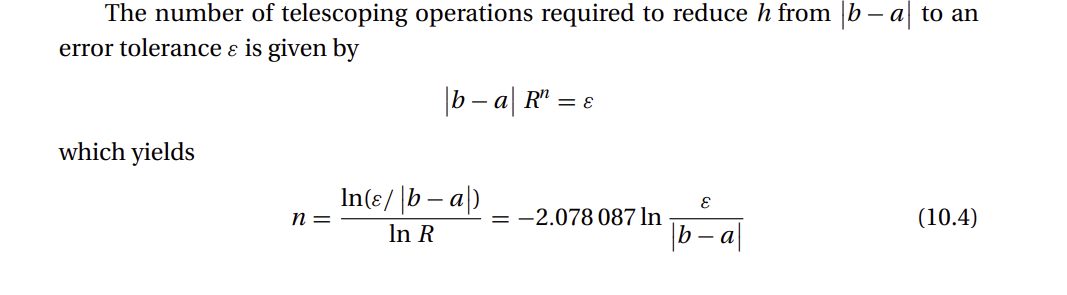

In [3]:
Image(filename='4.png',width="800")

In [5]:
def search(f,a,b,tol=1.0e-9):
    nIter = int(math.ceil(-2.078087*math.log(tol/abs(b-a))))
    R = 0.618033989
    C = 1.0 - R
# First telescoping
    x1 = R*a + C*b
    x2 = C*a + R*b
    
    f1 = f(x1)
    f2 = f(x2)
# Main loop
    for i in range(nIter):
        if f1 > f2: #x1과 b사이에 최소값 존재 , 구간을 (x1,b로 재설정.)
            a = x1
            x1 = x2
            f1 = f2
            x2 = C*a + R*b
            f2 = f(x2)
        else: #a와 x2사이에 최소값 존재 
            b = x2
            x2 = x1
            f2 = f1
            x1 = R*a + C*b
            f1 = f(x1)
    if f1 < f2: 
        return x1,f1
    else: 
        return x2,f2

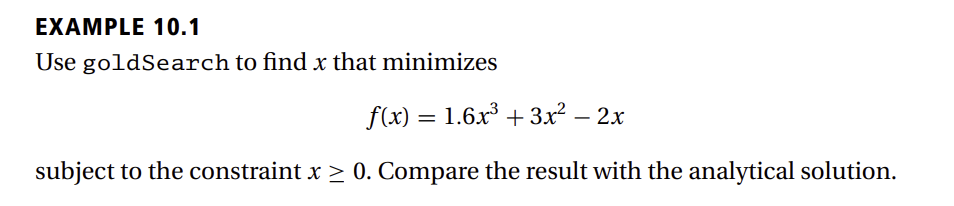

In [7]:

Image(filename='스크린샷 2023-06-01 161625.png',width="800")

In [ ]:
def f(x):
    return 1.6*x**3 + 3 *x**2 - 2*x

xStart=1.0
h=0.01
x1,x2=bracket(f,xStart,h)
x,fmin=search(f,x1,x2)
print(x,fmin)

제약조건 다루기 : 0보다 작은 범위에서는 함수값을 $\lambda*(x)^2$ 만큼 키워 최소값을 나오지 못하게 한다.

$$f(x)+\lambda[min(0,x)]^2$$

In [6]:
def f(x):
    lam = 1.0
    c=min(0.0,x)
    return 1.6*x**3 + 3 *x**2 - 2*x +lam*c**2 
xStart=1.0
h=0.01
x1,x2=bracket(f,xStart,h)
x,fmin=search(f,x1,x2)
print(x,fmin)

0.2734941131714084 -0.28985978554959224


## powell

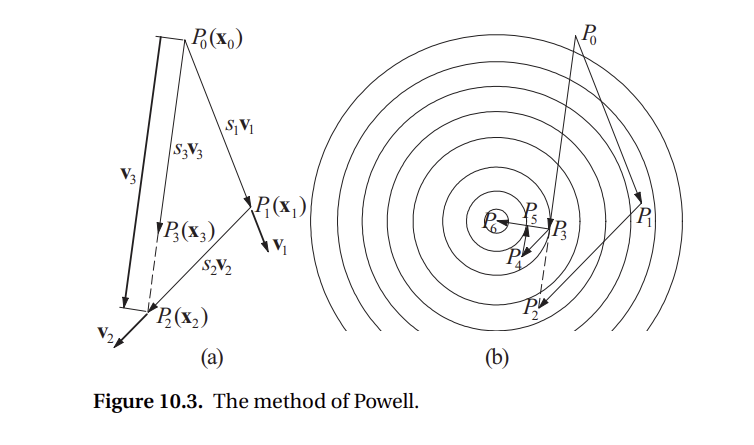

In [10]:
Image(filename='8.png',width="600")

*(a) 사이클 1회*
- $x_0$에서 벡터 $v_1$방향으로 $F(x_0+s_1v_1)$이 최소화 되는 거리 $s_1$을 찾아 $x_1=x_0+s_1v_1$에 도달.
- $x_1$에서 벡터 $v_2$방향으로 $F(x_1+s_2v_2)$이 최소화 되는 거리 $s_2$를 찾아 $x_2=x_1+s_2v_2$에 도달.
- $v_3=x_2-x_0$방향으로 $F(x_0+s_3v_3)$이 최소화 되는 거리 $x_3$를 찾아 $x_3=x_0+s_3v_3$에 도달.

*(b) 사이클 2회*

- 최대 감소와 관련된 방향을 버리고 최신 검색을 기반으로 새로운 방향을 도입함으로써 
  다차원 공간에서 최소를 효율적으로 검색하는 것이 목표 . <br>
  
최대 감소 벡터가 v1이라고 하면 
$[v_1,v_2,v_3]~~ -> [v_2,v_3,v_4]$

In [22]:
u = np.identity(2)
u

array([[1., 0.],
       [0., 1.]])

In [1]:
def powell(F,x,h=0.1,tol=1.0e-6):
    def f(s): 
        return F(x + s*v) # F in direction of v
    n = len(x) # Number of design variables
    df = np.zeros(n) # Decreases of F stored here
    u = np.identity(n) # Vectors v stored here by rows
    
    for j in range(30): # Allow for 30 cycles:
        xOld = x.copy() # Save starting point
        fOld = F(xOld)
        
        # First n line searches record decreases of F
        for i in range(n): #v1,v2 방향으로 x1, x2 찾기
            v = u[i] # i번째 u값을 벡터로
            a,b = bracket(f,0.0,h)#구간찾기
            s,fMin = search(f,a,b)# 구간내 최소값 찾기
            df[i] = fOld - fMin #함수의 감소 저장
            fOld = fMin #함수 최소값은 다음 사이클을 위ㅐ fold로 저장.
            x = x + s*v
        #print(df)
        
        # Last line search in the cycle x1,x2를 이용해 x3찾기.
        v = x - xOld #v3=x2-x0
        a,b = bracket(f,0.0,h)
        s,fLast = search(f,a,b)
        x = x + s*v
        
        # Check for convergence
        if math.sqrt(np.dot(x-xOld,x-xOld)/n) < tol: #x-xold값이 허용오차보다 작으면 (벡터라 내적하고 n으로 나눔)
            return x,j+1 # 최소값이 되는 x값 과 반복개수.
        
        #검색 방향을 업데이트하는 목적은 목적 함수를 더 크게 감소시킬 수 있는 새로운 방향을 탐색하는 것입니다 
        #F. F알고리즘은 최대 감소와 관련된 방향을 버리고 최신 검색을 기반으로 새로운 방향을 도입함으로써 
        #다차원 공간에서 최소를 효율적으로 검색하는 것을 목표로 합니다 .
        
        # 사이클 돌리기 .
        
        # Identify biggest decrease & update search directions
        iMax = np.argmax(df) #df최대값 인덱스 가져오기.
        #print('imax:',iMax)
        for i in range(iMax,n-1): #최대 감소인덱스부터 n-1까지 반복 > 행렬의 검색 방향을 u왼쪽으로 이동하여 최대 감소와 관련된 방향을 무시하는 것입니다.
            u[i] = u[i+1] #루프 내에서 각 검색 방향은 u그 뒤에 오는 방향으로 대체됩니다. 이렇게 하면 최대 감소 방향을 제외하고 모든 검색 방향이 왼쪽으로 효과적으로 이동합니다.
            u[n-1] = v #루프 후 행렬의 마지막 행 u( u[n-1])이 최신 검색 방향( v)으로 업데이트됩니다. 이렇게 하면 최신 검색 방향이 후속 반복에 포함됩니다.
       # print('u:',u)
    print("Powell did not converge")

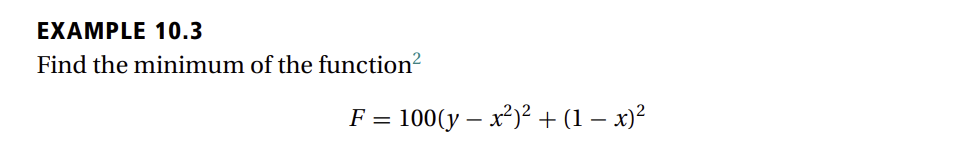

In [20]:
Image(filename='23.png',width="800")

In [24]:
import numpy as np
def F(x): return 100.0*(x[1] - x[0]**2)**2 + (1 - x[0])**2
xStart = np.array([-1.0, 1.0])
xMin,nIter = powell(F,xStart)
print("x =",xMin)
print("F(x) =",F(xMin))
print("Number of cycles =",nIter)

x = [1. 1.]
F(x) = 4.437342591868191e-31
Number of cycles = 14


## Nelder - Mead

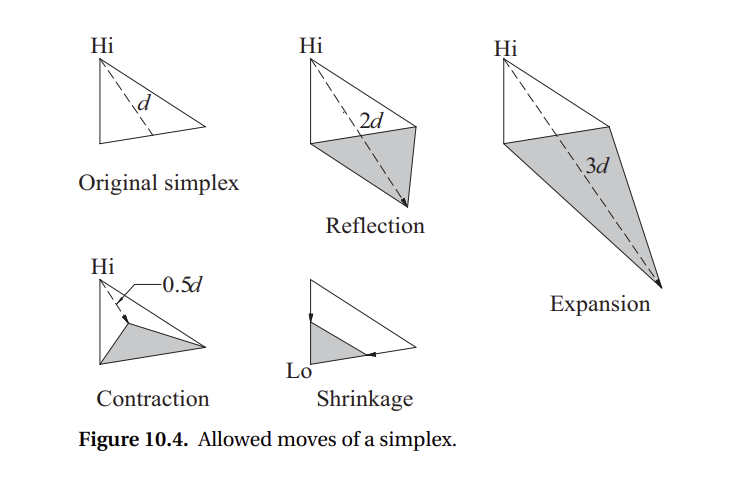

In [5]:
Image(filename='36.png',width="600")

Original simplex 는 3점으로 이루어져 있고 최소점을 찾기 위해 가장 함수 값이 큰 점에서 멀리 떨어진 곳에 새로운 점을 찍는다.(Reflection)

새로운 점의 함수값이 original simplex의 함수값이 가장 작은 점보다 작으면 Reflection 했던 방향으로 확장을 해 또다시 새로운 점을 찍는다.(Expansion)

expansion한 새로운 점의 함숫값이 최소 함수값 보다 작으면 expansion을 받아들이고

크면 , 수축 (contraction)을 한다. 수축해서 찾은 점이 원래 가장 큰 함숫값보다 작으면 contraction을 받아들이고 아니면 축소(Shrinkage)한다.

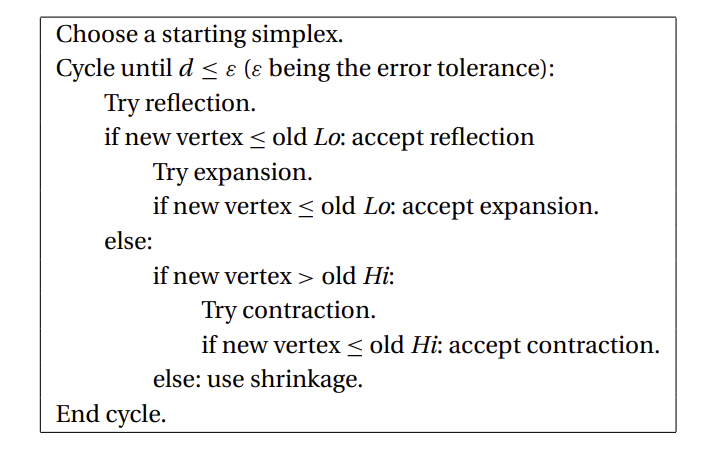

In [6]:
Image(filename='59.png',width="500")

In [3]:
# 시작 심플렉스는 x_0 와 x0+e_i b 이다. (e_i는 x_i좌표 방향으로 단위벡터)
# 사용자는 xStart와 심플렉스 모서리 길이 b를 입력한다. 
def downhill(F,xStart,side=0.1,tol=1.0e-6):
    n = len(xStart) # Number of variables
    x = np.zeros((n+1,n))
    f = np.zeros(n+1)
    # Generate starting simplex
    x[0] = xStart
    print(x)
    for i in range(1,n+1):
        x[i] = xStart
        x[i,i-1] = xStart[i-1] + side
        print(x)
# Compute values of F at the vertices of the simplex
    for i in range(n+1): 
        f[i] = F(x[i])
        # Main loop
    for k in range(500):
# Find highest and lowest vertices
        iLo = np.argmin(f)
        iHi = np.argmax(f)
# Compute the move vector d
    d = (-(n+1)*x[iHi] + np.sum(x,axis=0))/n
# Check for convergence
    if math.sqrt(np.dot(d,d)/n) < tol: 
        return x[iLo]
# Try reflection
    xNew = x[iHi] + 2.0*d
    fNew = F(xNew)
    if fNew <= f[iLo]: # Accept reflection
        x[iHi] = xNew
        f[iHi] = fNew
# Try expanding the reflection
        xNew = x[iHi] + d
        fNew = F(xNew)
        if fNew <= f[iLo]: # Accept expansion
            x[iHi] = xNew
            f[iHi] = fNew
        else:
# Try reflection again
            if fNew <= f[iHi]: # Accept reflection
                x[iHi] = xNew
                f[iHi] = fNew
            else:
# Try contraction
                xNew = x[iHi] + 0.5*d
                fNew = F(xNew)
                if fNew <= f[iHi]: # Accept contraction
                    x[iHi] = xNew
                    f[iHi] = fNew
                else:
# Use shrinkage
                    for i in range(len(x)):
                        if i != iLo:

                            x[i] = (x[i] - x[iLo])*0.5
                            f[i] = F(x[i])
    print("Too many iterations in downhill")
    return x[iLo]

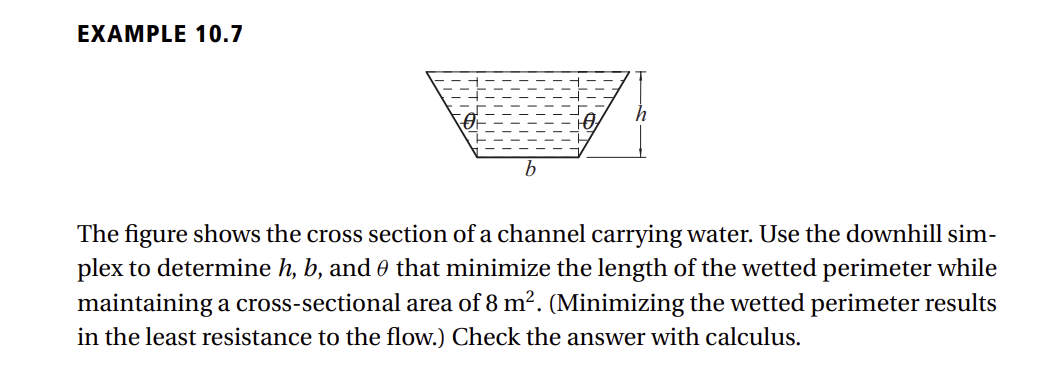

In [11]:
Image(filename='1.png',width="800")

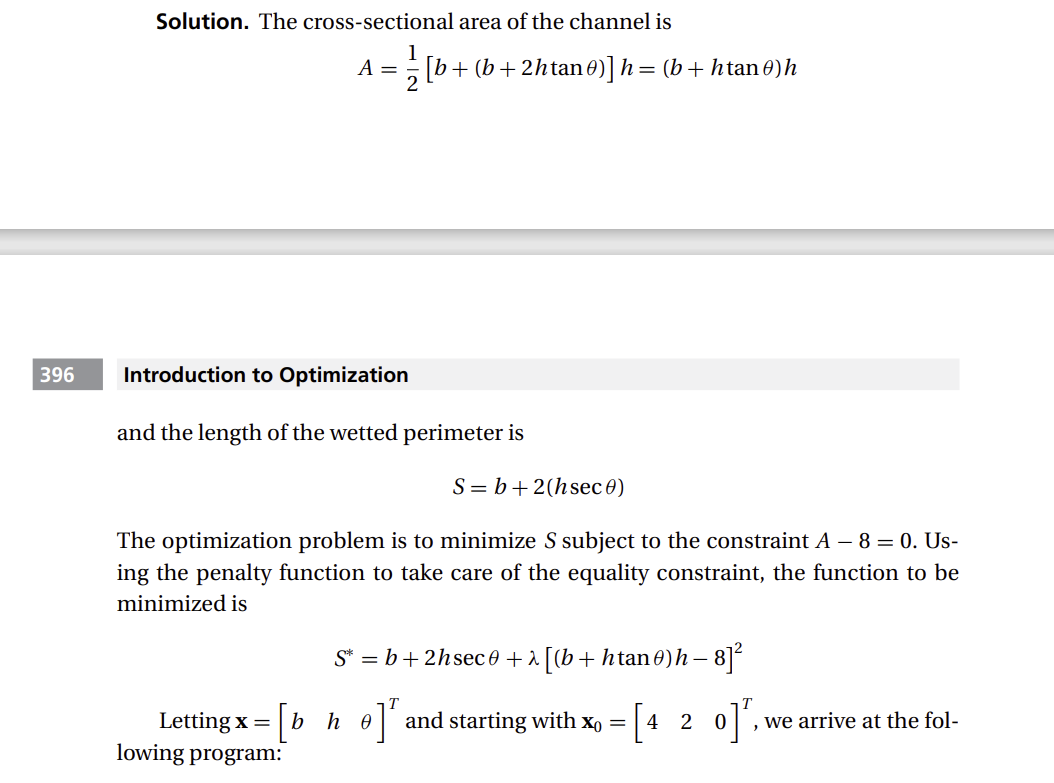

In [10]:
Image(filename='2.png',width="800")

최소화하려는 함수 S, 단면이 8로 고정되어 있을때가 제약조건임.
$$F^*=S+\lambda(A-8)$$

In [4]:
import numpy as np
import math
def S(x):
    global perimeter,area
    lam = 10000.0
    perimeter = x[0] + 2.0*x[1]/math.cos(x[2])
    area = (x[0] + x[1]*math.tan(x[2]))*x[1]
    return perimeter + lam*(area - 8.0)**2
xStart = np.array([4.0, 2.0, 0.0])
x = downhill(S,xStart)
area = (x[0] + x[1]*math.tan(x[2]))*x[1]
print("b = ",x[0])
print("h = ",x[1])
print("theta (deg) = ",x[2]*180.0/math.pi)
print("area = ",area)
print("perimeter = ",perimeter)

[[4. 2. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[4.  2.  0. ]
 [4.1 2.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
[[4.  2.  0. ]
 [4.1 2.  0. ]
 [4.  2.1 0. ]
 [0.  0.  0. ]]
[[4.  2.  0. ]
 [4.1 2.  0. ]
 [4.  2.1 0. ]
 [4.  2.  0.1]]
Too many iterations in downhill
b =  4.0
h =  2.0
theta (deg) =  0.0
area =  8.0
perimeter =  8.22075312938855
